In [59]:
#넘파이 사용하기
import numpy as np
#pyplot 사용하기
import matplotlib.pyplot as plt
#
from scipy import io

In [60]:
input_mat = io.loadmat('/content/SonarAl.mat')

In [61]:
print(input_mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Feb 25 13:19:03 2010', '__version__': '1.0', '__globals__': [], 'sonarAlt': array([[34.25491256, 33.60223519, 33.60223519, ..., 36.55540305,
        36.55540305, 36.55540305]])}


In [ ]:
#꺽새 차이점 보기
print(input_mat['sonarAlt'])
print(input_mat['sonarAlt'][0])

data_sonar = input_mat['sonarAlt'][0]
print(data_sonar)
print(len(data_sonar)) #데이터의 갯수를 볼 수 있음

In [63]:
def get_sonar(i):
    """Measure sonar."""
    z = input_mat['sonarAlt'][0][i]  # input_mat['sonaralt']: (1, 1501)
    return z

In [64]:
def mov_avg_filter(x_n, x_meas):
    """Calculate average sonar using a moving average filter (batch expression)."""
    n = len(x_n)
    for i in range(n-1): #인덱스는 0에서부터 시작하기 때문에 n-1을 해야함
      x_n[i] = x_n[i+1]
      x_n[n-1] = x_meas
      x_avg = np.mean(x_n)

    return x_avg, x_n

In [65]:
#input paramoters

n_samples = 500 #n_sample은 그대로, 데이터 갯수여서

n=10
time_end = 10

n1=20
time_end1 = 20

In [66]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

dt1 = time_end1 / n_samples
time1 = np.arange(0, time_end1, dt1)
x_meas_save_20 = np.zeros(n_samples)
x_avg_save_20 = np.zeros(n_samples)

In [ ]:
print(time)
print(x_meas_save)
print(x_avg_save)

print(time1)
print(x_meas_save_20)
print(x_avg_save_20)

In [ ]:
for i in range(n_samples):
  x_meas = get_sonar(i)
  if i == 0:
      x_avg, x_n = x_meas, x_meas * np.ones(n)  #x_meas * np.ones(n):배열이다 / 값이 얼마인지 보기 /x_meas * np.ones(n):의미파악 중요
      print(x_meas * np.ones(n))
  else:
    x_avg, x_n = mov_avg_filter(x_n, x_meas)
    print(x_n)
  x_meas_save[i] = x_meas
  x_avg_save[i] = x_avg

In [ ]:
#n을20
for i in range(n_samples):
  x_meas1 = get_sonar(i)
  if i == 0:
      x_avg1, x_n1 = x_meas1, x_meas1 * np.ones(n1)  #x_meas * np.ones(n):배열이다 / 값이 얼마인지 보기 /x_meas * np.ones(n):의미파악 중요
      print(x_meas1 * np.ones(n1))
  else:
    x_avg1, x_n1 = mov_avg_filter(x_n1, x_meas1)
    print(x_n1)
  x_meas_save_20[i] = x_meas1
  x_avg_save_20[i] = x_avg1

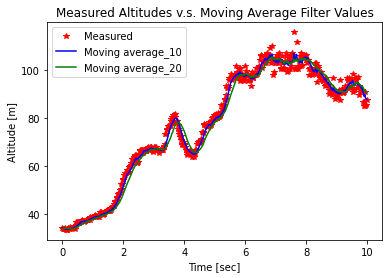

In [71]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average_10')
plt.plot(time, x_avg_save_20, 'g-', label='Moving average_20')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('/content/img')